# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo:  5__

__Nombres de los estudiantes: Gema Blanco Núñez y Diego Alejandro Rodríguez Pereira__

In [1]:
RANDOM_STATE=333

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [2]:
import pandas as pd

#Crear dataframe
df = pd.read_csv('cleveland.csv')

#Elimnar las filas que tengan datos incompletos
df = df.dropna()
df = df.reset_index(drop=True)

#Indicar variables categóricas
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')

#Modificar columna target
df['target']= df['target'].replace([0],'normal')
df['target']= df['target'].replace([1,2,3,4],'enfermo')


df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [3]:
# Mostrar datos estadísticos de cada variable
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


### Análisis de los rangos y distribuciones

Podemos comprobar que los datos estadísticos son calculados solo para las variables cuantitativas, que en este caso son la **edad** (age), **presión sanguínea** (trestbps), el **nivel de colesterol** (chol), el **frecuencia cardíaca máxima** (thalach), el **descenso del segmento ST tras un esfuerzo físico** (oldpeak) y el **número de vasos principales coloreados por floroscopia** (ca).

Respecto al **rango cubierto por las variables**, es importante que el conjunto de datos cubra lo mejor posible la casuística que se puede dar en la vida real, para que el algoritmo no se comporte de forma imprevisible cuando se le presente un individuo que se salga de los datos de entrada. 

- En el caso de la **edad** el rango va desde 29 a 77, con lo que el rango de valores **no cubre de forma óptima la casuística** ya que no se incluyen datos de personas menores de 29 años o mayores de 77 años para entrenar el sistema.

- En el caso de la **presión sanguínea** esta se puede clasificar como alta (120 mmHg aproximadamente en descanso) o baja (80 mmHg aproximadamente en descanso). Podemos ver que en nuestro conjunto de datos la mínima es de 94mmHg y la máxima de 200mmHg. Creemos que en este caso el rango de valores para esta variable **no cubre adecuadamente la casuística** ya que a pesar de que el valor máximo sobrepasa el valor estándar para una presión alta, el valor mínimo supera el valor estándar para una presión baja y por tanto el algoritmo no estaría entrenado para una gran parte de la población.

- En el caso del nivel de **colesterol** este depende de la edad y el sexo: los niveles saludables de colesterol total en personas de 19 años o menores es menos de 170 mg/dL, en hombres de 20 años o mayores es de 125 a 200 mg/dL y en mujeres de 20 años o mayores es de 125 a 200 mg/dL. Igual que en el caso anterior, sucede que el máximo está bastante lejos del valor saludable, pero el mínimo es superior al saludable y por tanto esta variable **no cubrirá toda la casuística**. 

- En el caso del **frecuencia cardíaca máxima** una frecuencia cardíaca en reposo normal para los adultos oscila entre 60 y 100 latidos por minuto. Podemos ver que vuelve a suceder lo mismo, los datos **no cubren toda la casuística** para esta variable.

- En el caso del **descenso del segmento ST**, el segmento ST normal es una linea plana (Isoelectrica), aunque también se considera normal una ligera elevación o depresión de entre 0.5 y 1 mm del segmento ST. En este caso creemos que los datos para esta variable **cubren gran parte de la casuística**, pues el máximo está bastante alejado de los valores normales.

- En el caso del **número de vasos principales coloreados** el rango es el esperado (0-3) acorde con la descripción proporcionada junto a cada variable.

In [4]:
# Correlación de Pearson
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
df.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000


### Análisis de los coeficientes de correlación

El coeficiente de correlación de Pearson nos indica el **grado de relación de dos variables**, así pues en todos los casos en los que una variable está relacionada consigo misma obtenemos una correlación directa. 

Analizando cada par de variables:

- **age-trestbps:** el valor de correlación es más cercano a 1, lo que signica que hay una correlación directa entre la edad y la presión sanguínea.
- **age-chol:** aunque el valor es alto, es más cercano a 0 que a 1, por lo que no existe correlación entre estas variables.
- **age-thalach:** en este caso el valor de correlación es cercano a -1, es decir, hay una correlación inversa entre la edad y la frecuencia cardíaca máxima, lo cual tiene sentido ya que la FCM se calcula como 220 lpm – edad, así que a mayor edad menor FCM.
- **age-oldpeak:** el valor es más cercano a 0 que a 1, por tanto no existe correlación entre este par de variables.
- **age-ca:** el valor es bastante alto, asi que existe una correlación directa entre estas variables.

- **trestbps-chol:** el valor de correlación es cercano a 0 lo que indica que no hay relación entre estas variables.
- **trestbps-thalach:** al igual que en el caso anterior, todo indica que tampoco hay relación entre este par de variables.
- **trestbps-oldpeak:** aunque este es el par con la variable trestbps para el que se obtuvo el valor más alto de correlación (exceptuando el par con ella misma), esta sigue siendo cercana a 0, por lo que no podemos decir que ambas variables estén relacionadas.
- **trestbps-ca:** para este par de variables tampoco hay correlación.


- **chol-thalach:** el valor de correlación es cercano a 0 lo que indica que no hay relación entre estas variables.
- **chol-oldpeak:**  en este caso no hay correlación entre el par de variables. 
- **chol-ca:** el valor de correlación es más cercano a 1  que en los casos anteriores, pero sigue siendo más cercano a 0, por lo que tampoco existe una correlación para este par.


- **thalach-oldpeak:** en este caso se ha obtenido una correlación inversa, es decir, las variables tienen una relación inversa, lo cual es razonable ya que el ritmo cardíaco máximo alcanzado en un segmento ST descendente es menor cuanto mayor es la pendiente del descenso.
- **thalach-ca:** para este par de variables también se ha obtenido una correlación inversa ya que el valor es cercano a -1.


- **oldpeak-ca:** el valor obtenido es cercano a 1, lo cual quiere decir que existe una correlación directa entre estas dos variables.

Aunque no tenemos conocimientos suficientes para verificar si todas las relaciones son acertadas, creemos que las correlaciones age-thalach y thalach-oldpeak obtenida es bastante acertada. En conclusión, hemos obtenido 6 pares de variables para las cuales existe correlación: age-trestbps (c.directa), age-thalach (c.inversa), age-ca (c.directa), thalach-oldpeak (c.inversa), thalach-ca (c.inversa) y oldpeak-ca (c.directa). El resto de variables no se relacionan entre si.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014AD080E760>,
      dtype=object)

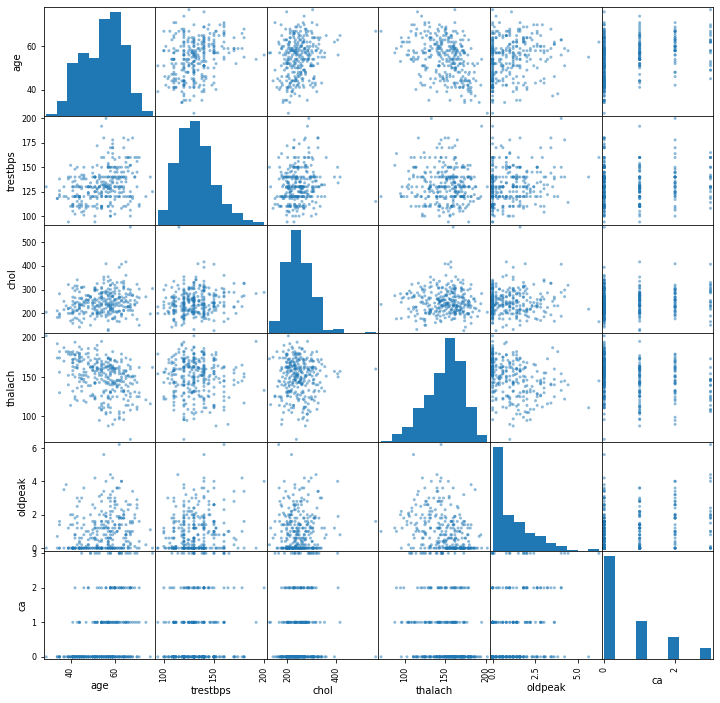

In [5]:
from pandas.plotting import scatter_matrix

#Diagrama de dispersión, con histogramas en la diagonal principal
scatter_matrix(df, figsize = (12, 12), diagonal = 'hist')

### Análisis del diagrama de dispersión

En el diagrama anterior podemos ver reflejada la **correlación** entre los pares de variables que hemos analizado en el apartado anterior.

Cabe destacar que los datos de la variable ca no son continuos, sino que se agrupan en 4 valores y por esta razón el diagrama de dispersión obtenido en los pares con esta variable son tan característicos.

Si nos fijamos en los **pares en los que existía correlación**, esto es, los pares thalach-oldpeak (c.inversa), thalach-ca (c.inversa) y oldpeak-ca (c.directa) podemos observar que en las correlaciones inversas los datos se agrupan más en torno a la esquina superior izquierda (valores altos de thalach y valores bajos en oldpeak y ca), mientras que en la correlación directa... (COMPLETAR)

Para el resto de **pares de variables en las que no existe correlación** los datos se distribuyen de forma dispersa.También podemos observar como algunas variables, como por ejemplo thalach, no cubren todo el rango de valores y los datos se concentran en torno a valores altos, dejando parte de la casuística sin cubrir.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

Como vamos a utilizar árboles de decisión, **no** es necesario reescalar los datos.

(COMPLETAR)

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [6]:
# Acceder al array interno del dataframe
# Array con los datos de entrenamiento
trainingData = df.drop(['target'],axis=1).to_numpy()

# Array con la variable de salida
dfTarget = df['target']
dfTarget = dfTarget.replace('enfermo',1)
dfTarget = dfTarget.replace('normal', 0)
target = dfTarget.copy().to_numpy()

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import numpy as np

train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 6)
for md in max_depths: 
    # Creamos el clasificador k-NN
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    # Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
    scores = cross_validate(clf, trainingData, target, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9147059645592265],
 [0.7404597701149426,
  0.7205747126436781,
  0.7906896551724139,
  0.7641379310344828,
  0.7705747126436783])

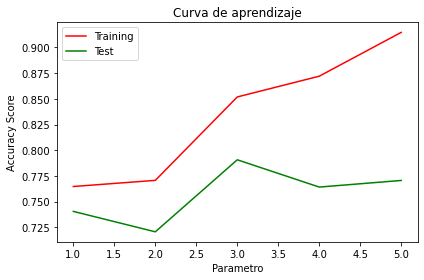

In [8]:
import matplotlib.pyplot as plt

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Análisis de la profundidad óptima del árbol

Observando la gráfica anterior hemos llegado a la conclusión de que la **profundidad óptima del árbol de decisión es 3**, debido a que es el punto donde se alcanza la mayor exactitud para el conjunto de entrenamiendo y test y a partir del cual empeora la exactitud para el conjunto test, indicando que el clasificador está sobre-entrenado y generaliza peor.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

In [9]:
# Suponemos la siguiente combinación como la óptima
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
clf = clf.fit(trainingData, target)

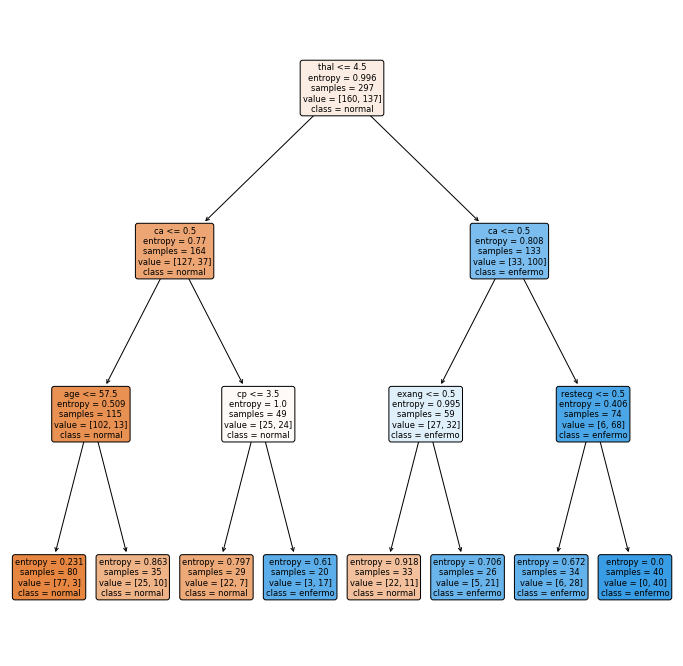

In [10]:
from sklearn.tree import plot_tree

# Pintamos el árbol
target_names = ['normal','enfermo']
feature_names = df.drop(['target'],axis=1).keys()

plt.figure(figsize=(12,12))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.show()

### ¿Cuáles son las variables más importantes y en qué orden?

Las **variables más importantes son aquellas que están en los primeros niveles** del árbol porque permiten descartar otras clases a partir de su clasificación. Así pues, el **orden de importancia** de mayor a menor de las variables es el siguiente: thai - ca - age - cp - exang - restcg.

### ¿Hay variables del conjunto de datos que no se han usado?

### ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta?

### ¿El árbol que hemos construido es capaz de separar las clases?

### ¿En cuál de los nodos hoja existe mayor confusión?

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

### Precisión, exhaustividad y valor F1

In [11]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, trainingData, target, scoring=scoring_metrics, cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


### Métricas detalladas por cada clase

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, trainingData, target, cv=10)

# Informe por clases
cr = classification_report(target,predictions, target_names=target_names)
print(cr)

              precision    recall  f1-score   support

      normal       0.78      0.86      0.82       160
     enfermo       0.82      0.71      0.76       137

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



### Matriz de confusión

In [13]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[138  22]
 [ 40  97]]


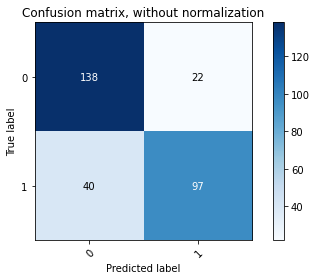

In [14]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
t = np.array([0,1])

plot_confusion_matrix(target, predictions, t, normalize=False)